In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

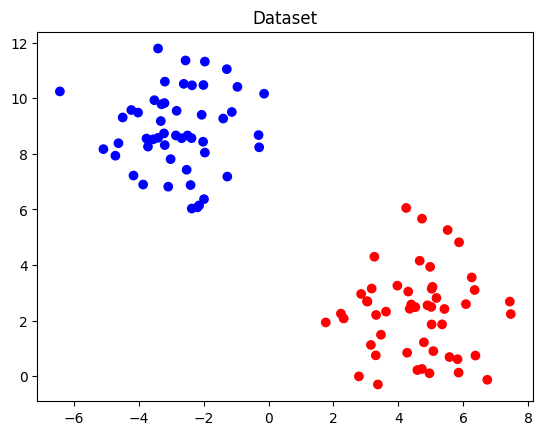

In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Dataset")
plt.show()

In [3]:
class Perceptron:
    def __init__(self, input_size):
        self.W = np.zeros(input_size + 1) # add 1 space for bias
        print(f"Shape of weights: {self.W.shape}")

    def activation_fn(self, x):
        return 1 if x >=0 else 0
    
    def predict(self, x):
        z = np.dot(x, self.W[1:]) + self.W[0]
        output = self.activation_fn(z)
        return output
    
    def train(self, X, y, lr=0.01, epochs=10):
        for _ in range(epochs):
            for input, label in zip(X, y):
                pred = self.predict(input)
                loss = label - pred
                self.W[1:] += lr * loss * input
                self.W[0] += lr * loss
        print("Train completed!")

In [4]:
perceptron = Perceptron(input_size=2)
perceptron.train(X=X, y=y, lr=0.001, epochs=20)

Shape of weights: (3,)
Train completed!


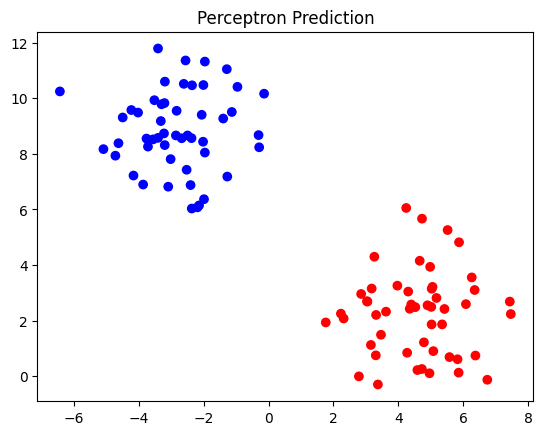

In [5]:
predictions = [perceptron.predict(sample) for sample in X]

plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', marker='o')
plt.title('Perceptron Prediction')
plt.show()

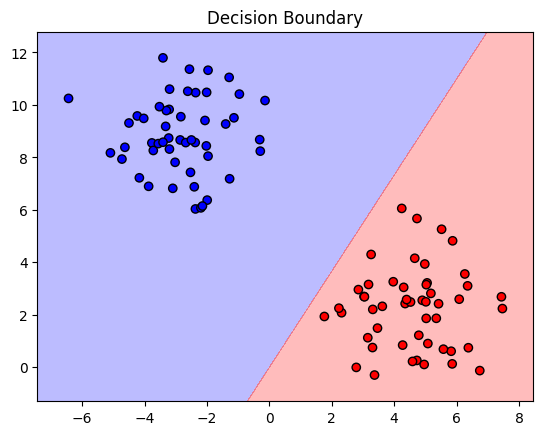

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
plt.title('Decision Boundary')
plt.show()